In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
n = 1000
x = np.random.randn(n)
y = np.random.randn(n)

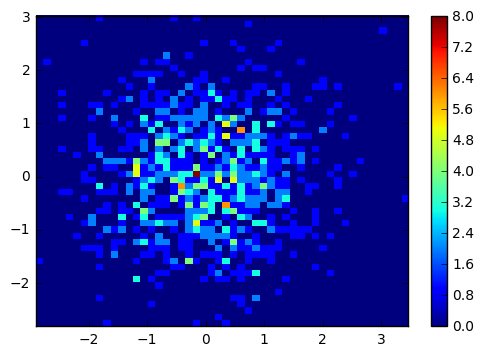

In [136]:
bins = 50
plt.hist2d(x, y, bins=bins)
# plt.plot(x,y, 'r.')
plt.colorbar()
plt.show()

In [137]:
h, xedges, yedges, _ = plt.hist2d(x,y, bins=bins)

In [138]:
dx = xedges[1] - xedges[0]
dy = yedges[1] - yedges[0]
A = dx*dy
density = h/A

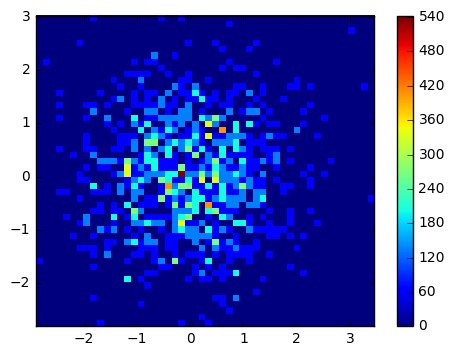

In [139]:
plt.imshow(density.T, origin='lower', interpolation='nearest', extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]])
# plt.plot(x, y, 'r.')
plt.colorbar()
plt.show()

In [140]:
# Find bin centers
x_centers = []
y_centers = []
for i in range(0,len(xedges)-1):
    x_centers.append((xedges[i+1]-xedges[i])/2)
    y_centers.append((yedges[i+1]-yedges[i])/2)

In [141]:
x_centers = xedges[:-1]+np.diff(xedges)/2
y_centers = yedges[:-1]+np.diff(yedges)/2
center_coords = list(zip(x_centers, y_centers))

In [142]:
r = np.zeros([len(x_centers), len(y_centers)])
for i in range(len(x_centers)):
    for j in range(len(y_centers)):
            rsqr = np.abs((x_centers[j]-x_centers[i])**2 + (y_centers[j]-y_centers[i])**2)
            r[i,j] = np.sqrt(rsqr)

In [143]:
r_inv = np.zeros(r.shape)
for i in range(len(r)):
    for j in range(len(r)):
        if i != j:
            r_inv[i,j] = 1/r[i,j]

In [175]:
density_FT = np.fft.fft(density*np.hamming(len(density)))
r_inv_FT = np.fft.fft(r_inv*np.hamming(len(density)))
# r_inv_FT = np.linalg.inv(r_FT)
potential_FT = np.dot(density_FT, r_inv_FT)
potential = np.fft.ifft(potential_FT)

In [173]:
# potential = np.fft.fftshift(potential, axes=(1,))

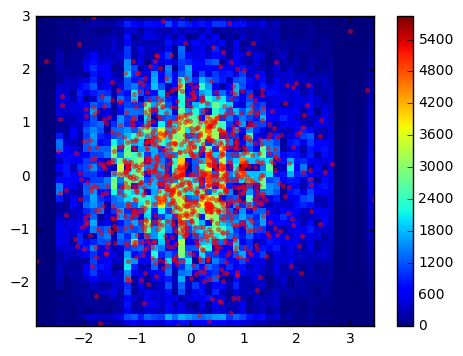

In [185]:
plt.imshow(np.abs(potential).T, origin='lower', interpolation='nearest', extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]])
plt.plot(x, y, 'r.', alpha=0.5)
plt.colorbar()
plt.axis([xedges[0],xedges[-1],yedges[0],yedges[-1]])
plt.show()

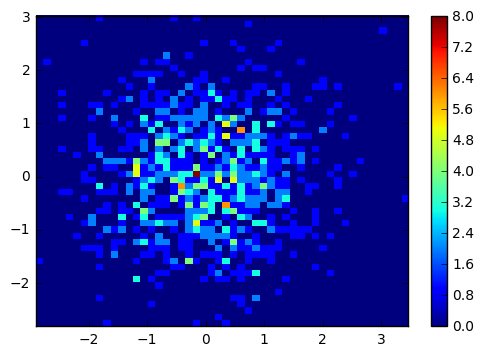

In [157]:
plt.hist2d(x, y, bins=bins)
plt.colorbar()
plt.show()

In [ ]:
r_inv_FT = np.linalg.inv(r_FT)
r_inv_FT

In [ ]:
i=0;j=0
while i <= 2:
    while j <= 2:
        if i != j:
            print(i,j)
        j += 1
    i += 1

In [ ]:
print(r.shape)

In [23]:
np.fft.fftshift?